# **Double Pendulum**

A double pendulum consists of one pendulum attached to another. Double pendulums are an example of a simple physical system which can exhibit chaotic Eric Weisstein's World of Math behavior. For understanding this better, let´s take a look to the next gif and image:

![DoubleURL](https://community.wolfram.com//c/portal/getImageAttachment?filename=doublepe.gif&userId=421820 "doublePendulum")


Consider a double bob pendulum with masses $m_{1}$ and $m_{2}$ attached by rigid massless wires of lengths $l_{1}$ and $l_{2}$. Further, let the angles the two wires make with the vertical be denoted $\theta_{1}$ and $\theta_{2}$, let´s see the image for understanding better what we´re saying here:

![imagenpng](https://upload.wikimedia.org/wikipedia/commons/7/78/Double-Pendulum.svg)

Finally, let gravity be given by $g$. Then the positions of the bobs are given by:


$$x_{1} = l_{1} sin(\theta_{1})$$

$$y_{1} = -l_{1}cos(\theta_{1})$$

$$x_{2} = l_{1}sin(\theta_{1}) + l_{2} sin(\theta_{2})$$

$$y_{2} = -l_{1}cos(\theta_{1}) - l_{2}cos(\theta_{2})$$


After applying the Lagrangian operator and some mathematical process we found the equations for $\ddot{\theta}_{1}$ and $\ddot{\theta}_{2}$. (We will add a link to the mathematical process that we just mentioned because it is really long and it will be more explicative if you go to the webpage). The values for $\ddot{\theta_{1}}$ and $\ddot {\theta_{2}}$  are:


$$\ddot {\theta_{1}} = \frac {-g (m_{1}+m_{2}) sin(\theta_{1}) + m_{2} (-\dot{\theta_{1}}^{2} (l_{2} m_{1} +l_{1} m_{2} cos(\theta_{1} - \theta_{2})) sen(\theta_{1} - \theta_{2}) + g m_{2} cos(\theta_{1} - \theta_{2}) sen(\theta_{2})) }{l_{1} (m_{1} + m_{2} - m_{2}  cos(\theta_{1} - \theta_{2})^{2})}$$


$$\ddot{\theta_{2}} = \frac { -m_{2} ( (g (m_{1} + m_{2}) cos(\theta_{1}) + \ddot {\theta_{1}^2}) (l_{1} (m_{1} + m_{2}) + l_{2} m_{2} cos(\theta_{1} - \theta_{2}))) sin(\theta_{1} - \theta_{2}))}{ -l_{2} m_{1} (m_{1} + m_{2}) + l_{2} m_{2}^2 cos(\theta_{1} - \theta_{2})^2 }$$

---

Now, let's analyze these two angle formulas a little. The double pendulum works like two normal pendulums individually, but the double pendulum joins these two pendulums. This means that harmonic/periodic/uniform behavior could be expected when **the initial angle of both pendulums is less than or equal to 15 degrees** and we could expect chaotic behavior in any other case.

And now, let´s see the code!



In [1]:
import numpy as np
import matplotlib.pyplot as plt

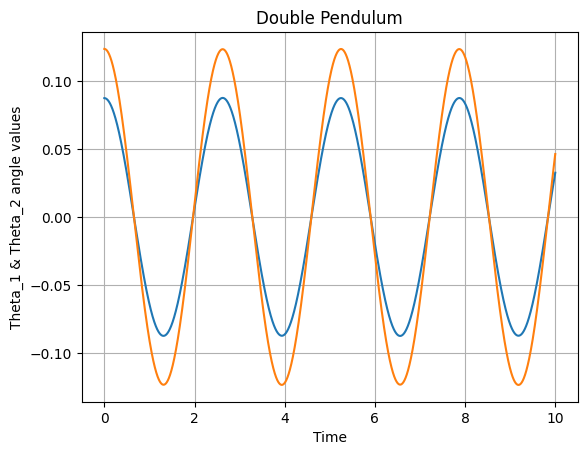

In [2]:
def equations(initial_conditions1, initial_conditions_2):
    """
    :param initial_conditions1:
    :param initial_conditions_2:
    :return: time, and values for theta 1 and 2 , and its derivatives
    """
    size = len(initial_conditions1)
    array_theta_2 = np.zeros(size)
    array_theta_1 = np.zeros(size)
    # constants
    gravity = 9.8
    mass_1 = 2
    mass_2 = 2
    length_1 = 1
    length_2 = 1
    array_theta_1[0] = initial_conditions1[1]
    array_theta_2[0] = initial_conditions_2[1]

    array_theta_1[1] = -((gravity * (2 * mass_1 + mass_2) * np.sin(initial_conditions1[0]) +
                          mass_2 * (gravity * np.sin(initial_conditions1[0] -
                                                     2 * initial_conditions_2[0]) + 2 * (
                            length_2 * initial_conditions_2[1] ** 2 +
                            length_1 * initial_conditions1[1] ** 2 * np.cos(
                                initial_conditions1[0] -
                                initial_conditions_2[0])) * np.sin(
                            initial_conditions1[0] - initial_conditions_2[0]))) / (
                                 2 * length_1 * (mass_1 + mass_2 - mass_2 * np.cos(initial_conditions1[0] -
                                                                                   initial_conditions_2[0]) ** 2)))

    array_theta_2[1] = (((mass_1 + mass_2) * (length_1 * initial_conditions1[1] ** 2 +
                                              gravity * np.cos(initial_conditions1[0])) + length_2 * mass_2 *
                         initial_conditions_2[1] ** 2 * np.cos(initial_conditions1[0] -
                        initial_conditions_2[0])) *
                        np.sin(initial_conditions1[0] - initial_conditions_2[0])) / (
                               length_2 * (mass_1 + mass_2 - mass_2 * np.cos(initial_conditions1[0] -
                                                                             initial_conditions_2[0]) ** 2))
    return array_theta_1, array_theta_2


# rk4 numeric method used to calculate both theta's
def rk4(initial_time, end_time, steps, initial_conditions1, initial_conditions2):
    """
    :param initial_time: 0 normally
    :param end_time: time in seconds
    :param steps: how many steps
    :param initial_conditions1:
    :param initial_conditions2:
    :return: values for the time array and theta 1 and 2 , and its derivatives
    """
    delta_time = (end_time - initial_time) / steps
    time_array = np.arange(initial_time, end_time + delta_time, delta_time)
    theta_1 = []
    theta_2 = []
    theta_1.append(initial_conditions1)
    theta_2.append(initial_conditions2)
    for i in range(0, steps):
        array_theta_1, array_theta_2 = equations(theta_1[i], theta_2[i])
        k1x = delta_time * array_theta_1
        k1y = delta_time * array_theta_2
        array_theta_1, array_theta_2 = equations(theta_1[i] + k1x / 2, theta_2[i] + k1y / 2)
        k2x = delta_time * array_theta_1
        k2y = delta_time * array_theta_2
        array_theta_1, array_theta_2 = equations(theta_1[i] + k2x / 2, theta_2[i] + k2y / 2)
        k3x = delta_time * array_theta_1
        k3y = delta_time * array_theta_2
        array_theta_1, array_theta_2 = equations(theta_1[i] + k3x, theta_2[i] + k3y)
        k4x = delta_time * array_theta_1
        k4y = delta_time * array_theta_2
        theta_1.append(theta_1[i] + (1 / 6) * (k1x + 2 * (k2x + k3x) + k4x))
        theta_2.append(theta_2[i] + (1 / 6) * (k1y + 2 * (k2y + k3y) + k4y))

    theta_1 = np.array(theta_1)
    theta_2 = np.array(theta_2)
    return time_array, theta_1, theta_2


u1 = np.array([np.deg2rad(5), 0])
u2 = np.array([np.deg2rad(5 * np.sqrt(2)), 0])

time, theta1, theta2 = rk4(0, 10, 10000, u1, u2)
plt.plot(time, theta1[:, 0])
plt.plot(time, theta2[:, 0])
plt.grid("---")
plt.title("Double Pendulum"); plt.xlabel("Time"); plt.ylabel("Theta_1 & Theta_2 angle values")
plt.show()

Let´s try a bigger angle for each pendulum amd see their behavior individually!

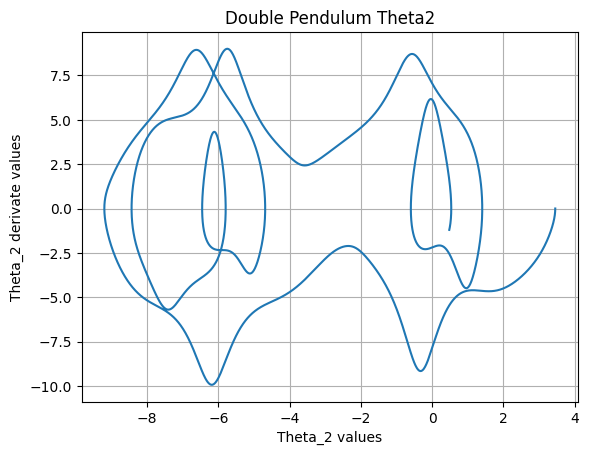

In [3]:
u1 = np.array([np.deg2rad(45), 0])
u2 = np.array([np.deg2rad(140 * np.sqrt(2)), 0])

time, theta1, theta2 = rk4(0, 10, 10000, u1, u2)
plt.plot(theta2[:, 0],theta2[:, 1])
plt.grid("---")
plt.title("Double Pendulum Theta2"); plt.xlabel("Theta_2 values"); plt.ylabel("Theta_2 derivate values")
plt.show()

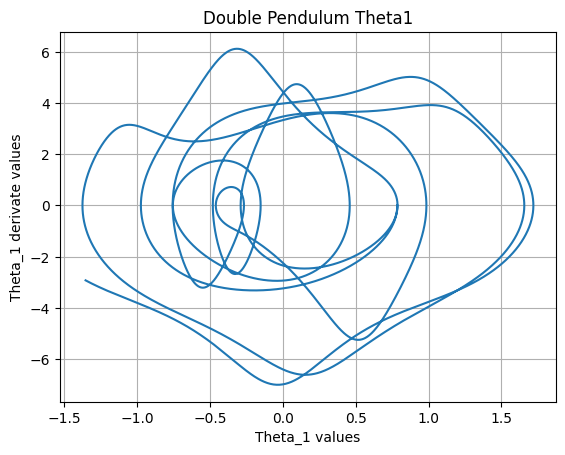

In [4]:
u1 = np.array([np.deg2rad(45), 0])
u2 = np.array([np.deg2rad(140 * np.sqrt(2)), 0])
time, theta1, theta2 = rk4(0, 10, 10000, u1, u2)
plt.plot(theta1[:, 0],theta1[:, 1])
plt.grid("---")
plt.title("Double Pendulum Theta1"); plt.xlabel("Theta_1 values"); plt.ylabel("Theta_1 derivate values")
plt.show()

As can be seen in the first graph, the behavior of both pendulums is uniform, given that the initial angles of both pendulums in this graph are 5° and 5° respectively. But if we look at the other two graphs where we graph the value of the angle $\theta_{1}$ and its derivative; and the value of the angle $\theta_{2}$ and its derivative, we can see that the behavior of each of the pendulums is completely chaotic and there is no longer a trend or uniformity in their oscillations.

In [5]:
%%html

<iframe src="simulaciones/DoublePendulum.html" width="800" height="400"></iframe>

**[Mathematical Process of Double Pendulum deduction](https://scienceworld.wolfram.com/physics/DoublePendulum.html)**

We add in **[here](https://colab.research.google.com/drive/14GOCVFiT6wiC8I325PFWz7IhM8xh8_C_)** a link to a Google Colab that has a bit of interface and/or interaction with the user and allows you to modify the initial values ​​of the graphs or directly play with the code. We hope you really use it because that´s the way where you would be able to use it for the specific values of your problem. 

Have Fun!! :)))